In [1]:
import os
import sys
sys.path.append(os.path.abspath('..')) # add parent path to working directory

In [2]:
from importlib import reload # Reload models so that changes in the scripts are loaded
from scripts import data_load_clean_transform, change_point_analysis, brent_oil
reload(change_point_analysis)
reload(data_load_clean_transform)
reload(brent_oil)

<module 'scripts.brent_oil' from 'c:\\ML and DS Files\\Kifiya AI\\Kaim-week-10\\scripts\\brent_oil.py'>

In [3]:
from scripts.data_load_clean_transform import DataLoader, DataCleaner  # import data loader and data clearner classes
from scripts.change_point_analysis import SalesChangePointAnalysis
from scripts.brent_oil import BrentOilAnalysis

In [4]:
#Load CSV File
file_path = '../week 10 data/Data/BrentOilPrices.csv'
load_data = DataLoader(file_path)
data = load_data.load_csv()

2025-02-24 10:32:20,480 - INFO - Data successfully loaded from ../week 10 data/Data/BrentOilPrices.csv
2025-02-24 10:32:20,482 - INFO - DataFrame Shape: (9011, 2)


In [5]:
# see information about loaded data
cleaner = DataCleaner(data)
cleaner.check_missing_values()

2025-02-24 10:32:20,499 - INFO - Checking for missing values in the DataFrame.
2025-02-24 10:32:20,504 - INFO - Missing values check completed.


,Column,Missing Values,Missing Percentage,Data Type
0,Date,0,0.0,object
1,Price,0,0.0,float64


In [6]:
cleaner.transform_datetime('Date')

2025-02-24 10:32:20,535 - INFO - Transforming datetime column 'Date' without timezone conversion.


c:\ML and DS Files\Kifiya AI\Kaim-week-10\scripts\data_load_clean_transform.py:100: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[column] = pd.to_datetime(self.df[column])


2025-02-24 10:32:21,251 - INFO - Datetime transformation for column 'Date' completed.


In [7]:
# Nstantiante the class and run the analysis
analysis = BrentOilAnalysis(data)

2025-02-24 10:32:21,274 - INFO - Data initialized and sorted.


In [8]:
#Check Stationarity
is_stationary = analysis.check_stationarity()
print(f"Is Data Stationary? {is_stationary}")


2025-02-24 10:32:21,724 - INFO - ADF Statistic: -1.9938560113924677, p-value: 0.28927350489340287
Is Data Stationary? False


In [9]:
# Markov-Switching ARIMA 
ms_summary = analysis.fit_markov_switching(k_regimes=2)
print(ms_summary)

2025-02-24 10:32:21,733 - INFO - Fitting Markov Switching model with 2 regimes.


c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:                  Price   No. Observations:                 9011
Model:               MarkovRegression   Log Likelihood              -35281.967
Date:                Mon, 24 Feb 2025   AIC                          70575.934
Time:                        10:32:30   BIC                          70618.571
Sample:                             0   HQIC                         70590.441
                               - 9011                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0441      0.088    227.669      0.000      19.872      20.217
sigma2        26.3180      0.704     37.394      0.0

In [10]:
# train LSTM Model
lstm_model = analysis.fit_lstm(epochs=50, batch_size=32)

2025-02-24 10:32:30,206 - INFO - Training LSTM model.
Epoch 1/50


c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


281/281 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0174
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 3.3312e-04
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 3.3138e-04
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 2.7382e-04
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 2.4243e-04
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 1.9957e-04
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 1.6404e-04
Epoch 8/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 1.5421e-04
Epoch 9/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 1.1962e-04
Epoch 10/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 1.3284e-04
Epoch 11/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 1.1220e-04
Epoch 12/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 1.1288e-04
Epoch 13/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 1.1459e-04
Epoch 14/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 1.0586e-04
Ep

2025-02-24 10:39:24,440 - INFO - Forecasting next 60 days using LSTM.


c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


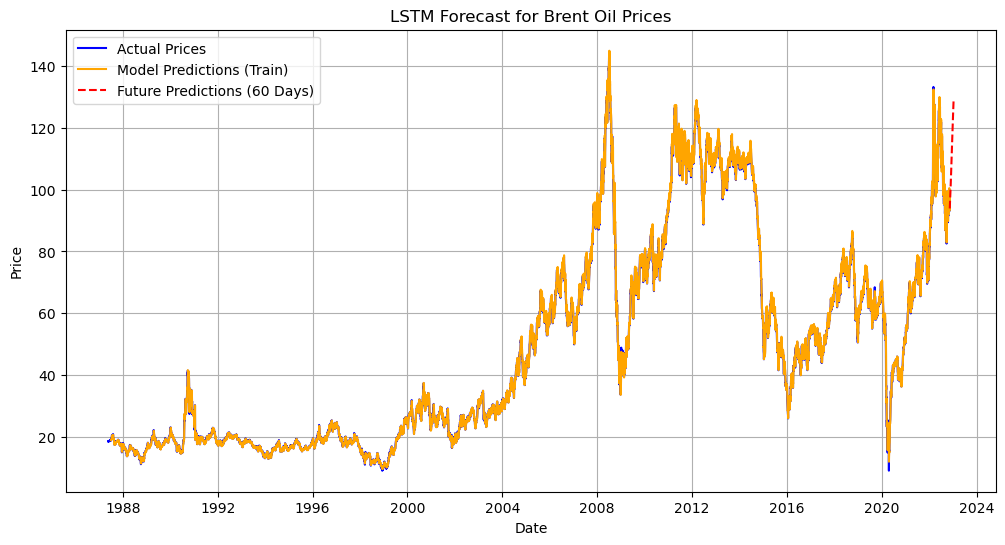

2025-02-24 10:39:43,959 - INFO - LSTM forecast plotted successfully.


In [11]:
future_predictions = analysis.forecast_lstm(future_days=60)